<a href="https://colab.research.google.com/github/tejaspradhan/Neural-Algorithmic-Reasoning/blob/main/MNIST_baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPool3D, Dense, Flatten, Dropout
from tensorflow import random
%matplotlib inline

In [4]:
data = np.load("/content/train_image_data.npz", allow_pickle=True)

In [5]:
x, y= data["x"], data["y"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [ ]:
X_train.shape

(14000, 3, 28, 28)

In [ ]:
#np.array([X_train]).shape

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 3, 28, 28, 1)

In [ ]:
X_train.shape

(14000, 3, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 3, 28, 28, 1)

In [ ]:
X_test.shape

(6000, 3, 28, 28, 1)

In [ ]:
random.set_seed(42)

model = Sequential()
model.add(Conv3D(256, 3, data_format= "channels_last", input_shape=(3,28,28,1), padding='same', activation='relu'))
model.add(MaxPool3D(pool_size=(2, 2, 2)))
model.add(Conv3D(256, 3,padding='same'))
#model.add(MaxPool3D(pool_size=(2, 2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='relu'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_20 (Conv3D)          (None, 3, 28, 28, 256)    7168      
                                                                 
 max_pooling3d_10 (MaxPoolin  (None, 1, 14, 14, 256)   0         
 g3D)                                                            
                                                                 
 conv3d_21 (Conv3D)          (None, 1, 14, 14, 256)    1769728   
                                                                 
 flatten_10 (Flatten)        (None, 50176)             0         
                                                                 
 dense_32 (Dense)            (None, 64)                3211328   
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                     

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
438/438 [==============================] - 40s 90ms/step - loss: nan - val_loss: 14.5387
Epoch 2/50
438/438 [==============================] - 39s 89ms/step - loss: 14.5871 - val_loss: 14.3410
Epoch 3/50
438/438 [==============================] - 39s 88ms/step - loss: 14.4377 - val_loss: 14.3572
Epoch 4/50
438/438 [==============================] - 38s 88ms/step - loss: 14.4125 - val_loss: 14.3242
Epoch 5/50
438/438 [==============================] - 39s 88ms/step - loss: 14.3859 - val_loss: 14.4166
Epoch 6/50
438/438 [==============================] - 39s 89ms/step - loss: 14.3793 - val_loss: 14.3112
Epoch 7/50
438/438 [==============================] - 39s 89ms/step - loss: 14.3360 - val_loss: 14.2486
Epoch 8/50
438/438 [==============================] - 39s 89ms/step - loss: 7.1409 - val_loss: 2.6182
Epoch 9/50
438/438 [==============================] - 39s 88ms/step - loss: 2.6345 - val_loss: 2.5569
Epoch 10/50
438/438 [==============================] - 39s 88ms/step - l

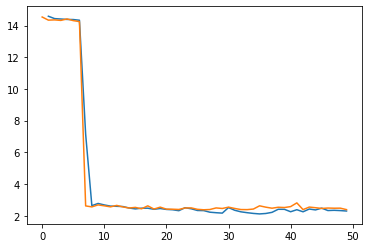

In [ ]:
plt.plot(range(50), history.history['loss'])
plt.plot(range(50), history.history['val_loss'])
plt.show()

In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
438/438 [==============================] - 39s 90ms/step - loss: 1.9935 - val_loss: 2.6452
Epoch 2/20
438/438 [==============================] - 39s 89ms/step - loss: 2.1342 - val_loss: 2.4439
Epoch 3/20
438/438 [==============================] - 39s 89ms/step - loss: 2.1631 - val_loss: 2.4361
Epoch 4/20
438/438 [==============================] - 39s 89ms/step - loss: 2.2693 - val_loss: 2.5109
Epoch 5/20
438/438 [==============================] - 39s 89ms/step - loss: 2.0265 - val_loss: 2.4173
Epoch 6/20
438/438 [==============================] - 39s 89ms/step - loss: 2.0584 - val_loss: 2.5222
Epoch 7/20
438/438 [==============================] - 39s 89ms/step - loss: 2.0255 - val_loss: 2.5424
Epoch 8/20
438/438 [==============================] - 39s 89ms/step - loss: 1.9845 - val_loss: 2.6670
Epoch 9/20
438/438 [==============================] - 38s 88ms/step - loss: 1.9478 - val_loss: 2.7122
Epoch 10/20
438/438 [==============================] - 38s 88ms/step - loss: 1.939

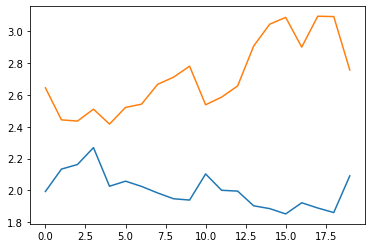

In [ ]:
plt.plot(range(20), history.history['loss'])
plt.plot(range(20), history.history['val_loss'])
plt.show()